# [SWCON253] Machine Learning
Teaching Assistant: Hyunmin Ban (hmban1996@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P3.A:  SVM을 이용하여 선형 분류 (4점)

### 학습목표
- SVM 모델을 이용하여 선형 분류 가능한 데이터를 분류하는 분류기를 학습 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 SVM을 이용하여 선형 분류가 가능한 데이터셋을 분류하는 분류기를 학습해봅니다.  
Scikit-Learn은 SVM Classification을 위해 SVC 클래스를 제공합니다. SVC 클래스 사용법은 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

실습은 다음 순서로 진행됩니다.
- 1) 주어진 데이터셋 loading
- 2) SVM 모델 구현, 학습 **<직접 구현>**
- 3) SVM 모델 검증 **<직접 구현>**
- 4) Decision Boundary 시각화
- 5) Discussion

**이번 실습에서 여러분은 `2), 3)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- SVM 모델 작성: 4점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## 1) Loading the Dataset
코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

In [ ]:
# CSV 파일을 읽기
X, y = [], []

with open('/content/drive/MyDrive/Colab Notebooks/dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))
        
print(len(X), len(y))

100 100


### Dataset Split & Visualization
Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [ ]:
import random


# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

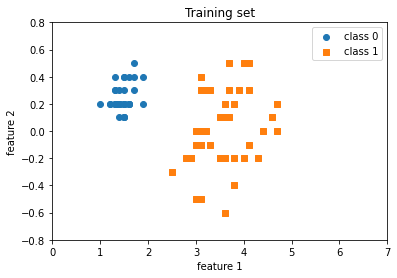

In [ ]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 2) SVM 모델 구현, 학습
이 부분에서는 Scikit-Learn의 SVC모듈의 linear 커널을 이용하여 선형 SVM모델을 선언하고 학습합니다.

여기서 사용하는 SVC 클래스는 C-Support Vector Classification으로 SVM을 사용한 분류기 모델입니다.

SVC class에서는 kernel 파라미터를 이용하여 사용하는 커널의 형태를 변경할 수 있습니다. 이번 실습에서는 'linear'(선형) 커널을 사용한 선형 SVM을 이용합니다.

아래 `# <your code>` 부분을 채워 넣어서 SVM 모델에 훈련 데이터를 넣을 수 있도록 코드를 직접 구현하세요.


In [ ]:
svm = SVC(kernel='linear') 
##### <your code> training with train dataset
svm.fit(X_train, y_train)

SVC(kernel='linear')

## 3) 모델 검증
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

아래 `<your code>` 부분을 채워 넣어서 정확도를 구하는 코드를 구현하세요.

In [ ]:
# Train dataset에서 성능 검증
print("훈련 세트 정확도: {:.2f}".format(svm.score(X_train, y_train)))
# Test dataset에서 성능 검증
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도: 1.00
훈련 세트 정확도: 1.00


## 4) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

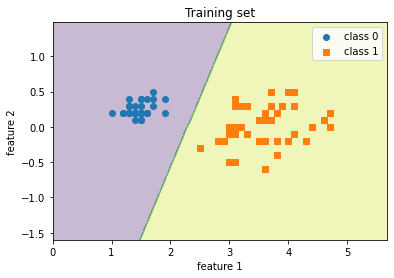

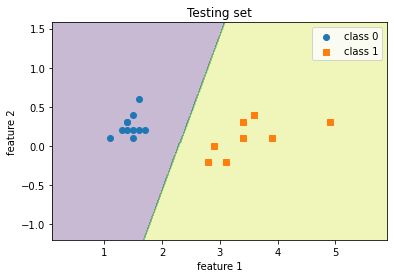

In [ ]:
### 데이터셋에서 Decision Boundary 시각화
X_train = np.array(X_train)
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # predict all datapoint from mashgrid
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3) # 범위를 색으로 표시

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


### Test 데이터셋에서 Decision Boundary 시각화
X_test = np.array(X_test)
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Testing set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 5) Discussion

**1) 이전 실습에서 사용된 Perceptron 과 SVM의 차이점에 대해 설명해보세요.**

퍼셉트론은 데이터가 딱 경계를 이룰정도로만 분리를 해서 일반화 성능이 조금부족할 수 있었지만, SVM을 사용하면 두 클래스간의 거리가 충분히 멀어져 일반화 성능이 좋아지니다.

**2) 선형 SVM 으로 풀 수 없는 문제는 어떤것이 있는지 왜 그런지 설명해보세요.**

단층 퍼셉트론처럼, 선형 SVM도 비선형으로 분포된 데이터를 분류하지 못합니다. SVM도 결국에는 margin이라는 제약조건을 준 퍼셉트론이기 때문에 비선형 문제는 해결할 수 없습니다.

---

# P3.B:  SVM을 이용하여 비선형 분류 (6점)

### 학습목표
- SVM 모델을 이용하여 **선형 분류 불가능**한 데이터를 분류하는 분류기를 학습 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 SVM을 이용하여 선형 분류가 불가능한 데이터셋을 분류하는 분류기를 학습해봅니다.  
Scikit-Learn은 SVM Classification을 위해 SVC 클래스를 제공합니다. SVC 클래스 사용법은 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

실습은 다음 순서로 진행됩니다.
- 1) 데이터셋 loading
- 2) SVM 모델 구현, 학습, 검증, Decision Boundary 시각화 **<직접 구현>**
- 3) Discussion

**이번 실습에서 여러분은 `2) SVM 모델 구현, 학습, 검증, Decision Boundary 시각화` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- Trainset과 Testset 정확도 95% 이상: 6점
- Trainset과 Testset 정확도 94% 이상: 5점
- Trainset과 Testset 정확도 93% 이상: 4점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

## 1) 데이터셋 loading

In [ ]:
# CSV 파일을 읽기
dataset = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/xor_dataset.csv", delimiter=",")
X = dataset[:, :2]
y = dataset[:, 2].astype(int)
print(len(X), len(y))

200 200


### Dataset Split, 시각화

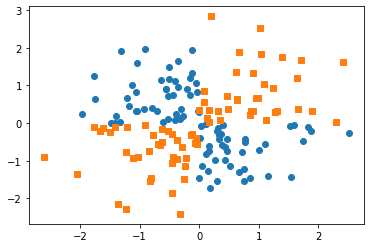

In [ ]:
# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 160개 까지는 학습용으로 뒤 40개는 테스트용으로 split
X_train = [X[i] for i in idx[:160]]
y_train = [y[i] for i in idx[:160]]
X_test = [X[i] for i in idx[160:]]
y_test = [y[i] for i in idx[160:]]

# 데이터셋 plot
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            marker='s')
plt.show()

## 2) SVM 모델 구현, 학습, 검증

SVM모델을 이용하여 위 데이터셋을 분류하는 분류기를 학습합니다.

1. 기존의 선형커널SVM을 이용하여 학습을 해봅니다.
2. 문제점을 확인하고 비선형 문제를 풀기 위해 커널을 변경해 봅니다.

### 선형 불가능한 문제
![](https://blog.kakaocdn.net/dn/1hyfi/btqwdhw53hZ/s33aTg9XF2ZDnoPkKs4IT0/img.png)

위 그림은 선형분리가 불가능한 데이터셋을 어떻게 커널 SVM이 분류하게 하는지 보여줍니다.
위 데이터셋은 2차원 평명상에서는 선형 분리가 불가능하지만, 오른쪽 처럼 3차원에서 보면 한 평면으로 분리가 가능합니다.
여기서 커널은 2차원 데이터를 3차원으로 매핑하는 함수를 의미하며, 커널의 모양에 따라 linear(선형), poly(다항), rbf(가우시안), sigmoid(시그모이드) 등으로 구분됩니다.
3차원상의 데이터를 구분하는 평면을 결정 평면이라고 합니다. 

그러나 커널은 단순히 2차원 데이터를 3차원으로 만 매핑하는것이 아니라 n차원 데이터를 n차원보다 높음 m차원으로 매핑 할 수 있습니다.
따라서 3차원 이상의 차원에서의 결정 경계를 결정 초평면이라고합니다.

정리하자면 커널 SVM은 다음과정을 통해 학습됩니다.
- 1) 커널함수를 이용해 데이터를 초공간으로 매핑
- 2) 매핑된 초공간에서 margin이 최대화 되는 결정 초평면 탐색

하지만 커널함수를 모든 데이터셋에 적용하게 되면 데이터셋이 커질수록 계산복잡도가 증가하게 됩니다. 따라서 우리는 모든 데이터셋에 적용하는것이 아니라 꼼수(Trick)을 써서 커널함수를 적용하게 됩니다. 이를 커널 트릭(Kernel Trick)이라고 합니다.

** 더 읽을 거리**
- [커널 함수와 커널 트릭](https://en.wikipedia.org/wiki/Kernel_method)

훈련 세트 정확도: 0.54
테스트 세트 정확도: 0.57


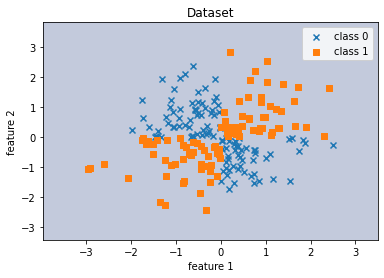

In [ ]:
# 기존의 선형 커널로 분류를 시도해 봅니다.
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
print("훈련 세트 정확도: {:.2f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

### 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == -1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == -1],
            label='class 1', marker='s')

# 그래프로 표현
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

예상했다시피 선형커널로는 분류가 불가능합니다. 위에서 설명한 커널들로 아래 코드를 변경하면서 최적의 커널을 찾아보세요.

사용가능한 파라미터는 다음과 같습니다.
- C: 규제 파라미터로서 값이 작을 수록 찾아지는 결정 경계의 마진이 커집니다.
- gamma: rbf, poly, sigmoid 커널에 사용되는 값으로 커널의 영향력을 나타냅니다. 값이 커질 수록 커널의 영향력이 커저 결정경계는 더 샘플에 가까워지고 구불구불하게 됩니다.

이외의 파라미터는 오른쪽 사이트를 참고하세요.
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

훈련 세트 정확도: 0.46
테스트 세트 정확도: 0.60


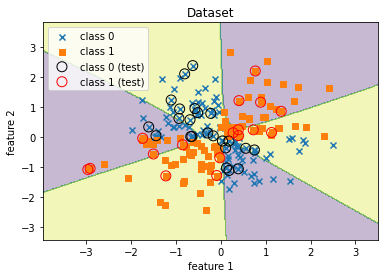

In [ ]:
# 비선형 커널의 일종인 RBF 커널로 분류를 시도해 봅니다.
svm = SVC(kernel = 'sigmoid', gamma = 1.0, C = 1.0)##### <your code>
svm.fit(X_train,y_train)

print("훈련 세트 정확도: {:.2f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))


### 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == -1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == -1],
            label='class 1', marker='s')
## testset 강조
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 0 (test)', facecolors='none', edgecolor='black', s=100, marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            label='class 1 (test)', facecolors='none', edgecolor='red', s=100, marker='o')


# 그래프로 표현
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.97


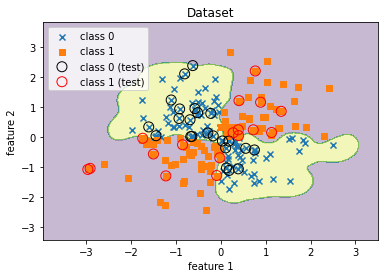

In [ ]:
# 비선형 커널의 일종인 RBF 커널로 분류를 시도해 봅니다.
svm = SVC(kernel = 'rbf', gamma = 10.0, C = 4.0)##### <your code>
##### <your code> training with train dataset

svm.fit(X_train,y_train)

print("훈련 세트 정확도: {:.2f}".format(svm.score(X_train, y_train)))

print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))


### 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == -1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == -1],
            label='class 1', marker='s')
## testset 강조
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 0 (test)', facecolors='none', edgecolor='black', s=100, marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            label='class 1 (test)', facecolors='none', edgecolor='red', s=100, marker='o')


# 그래프로 표현
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 3) Discussion

**1) 학습, 테스트 정확도는 얼마인가요? (위 숫자를 복사하세요.)**

- Training:  99%
- Test 97%

**2) SVM의 Parameter 값에 따라 발생할 수 있는 Overfitting과 Underfitting을 설명하세요.**

파라미터(C값, 감마값) 값이 너무 작다면 언더피팅이 발생한다.
파라미터(C값, 감마값) 값이 너무 크다면 오버피팅이 발생한다.

**3) 다른 커널(poly, sigmoid)을 사용했을 때의 결과를 rbf 커널과 비교하여 작성하세요.**

gamma = 10.0, C= 4.0

poly 커널
- 훈련 세트 정확도: 0.57
- 테스트 세트 정확도: 0.60
sigmoid 커널
- 훈련 세트 정확도: 0.49
- 테스트 세트 정확도: 0.53